In [1]:
####The objective is to identify the best sectors, countries, and a suitable investment type for making investments.####

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# the commonly used alias for seaborn is sns
import seaborn as sns
sns.set_style("whitegrid")
###Setting a variable 'path' for the location of all the files to be read 
path="E:/Mineetha/Upgrad/Assignments/Investment Analysis/Data/"

In [181]:
#Loading the companies data in to a dataframe called companies
companies=pd.read_csv(
    path+"companies.txt",sep='\t',encoding='ISO-8859-1')


In [182]:
################# ------ Understanding the dataframe, companies --------- #############


In [183]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [184]:
companies.shape

(66368, 10)

In [185]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In [186]:
companies.dtypes

permalink        object
name             object
homepage_url     object
category_list    object
status           object
country_code     object
state_code       object
region           object
city             object
founded_at       object
dtype: object

In [187]:
companies.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at'],
      dtype='object')

In [188]:
companies['permalink'].str.lower().unique()

array(['/organization/-fame', '/organization/-qounter',
       '/organization/-the-one-of-them-inc-', ...,
       '/organization/ã\x81eron', '/organization/ã\x94asys-2',
       '/organization/ä°novatiff-reklam-ve-tanä±tä±m-hizmetleri-tic'],
      dtype=object)

In [189]:
len(companies['permalink'].str.lower().unique())

66368

In [190]:
companies.permalink.nunique()

66368

In [191]:
companies['permalink'].str.lower().describe()

count                                   66368
unique                                  66368
top       /organization/securus-medical-group
freq                                        1
Name: permalink, dtype: object

In [192]:
len(companies['name'].str.lower().unique()) 

66038

In [193]:
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66102,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Razz,Spire,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [195]:
 ###Data Exploration and Cleaning###

###Inspecting Null Values#Dropping unnecessary columns#Dropping  rows with more null values###

In [196]:
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [197]:
####null values column-wise  percentage  
print(round(100*(companies.isnull().sum()/len(companies.index)), 2))

permalink         0.00
name              0.00
homepage_url      7.62
category_list     4.74
status            0.00
country_code     10.48
state_code       12.88
region           12.10
city             12.10
founded_at       22.93
dtype: float64


In [18]:
#############Removing unwanted COLUMNS, "homepage_url,status,state_code,region,founded_at"###################################

In [198]:
####Before deleting any rows and columns
companies.shape

(66368, 10)

In [199]:
companies=companies.drop(columns=['homepage_url','status','state_code','region','founded_at'])

In [200]:
###After deleting 5 columns###
companies.shape

(66368, 5)

In [201]:
#####Deleting rows with null values in the companies dataframe###country_code  and category_list are required for Analysis############################
companies = companies[~(companies['country_code'].isnull() |
                             companies['category_list'].isnull())]

In [202]:
###After deleting roes with null values in country_code  and category_list ####
companies.shape

(57804, 5)

In [203]:
###After cleaning the data###the column city is not required for the analysis,however keeping it for the sake of location info###
companies.isnull().sum()

permalink           0
name                1
category_list       0
country_code        0
city             1037
dtype: int64

In [204]:
#After data cleaning,count of unique values
companies.permalink.nunique()

57804

In [205]:
#################Loading the second dataset, rounds2 data in to a dataframe called rounds2#############
rounds2=pd.read_csv(path+"rounds2.csv",encoding='ISO-8859-1')
rounds2.company_permalink = rounds2.company_permalink.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')


In [206]:
###################################------------- Understanding the dataframe rounds2 -------------------###################


In [207]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [208]:
rounds2.tail()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/eron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/ORGANIZATION/ASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0
114948,/organization/novatiff-reklam-ve-tantm-hizmetl...,/funding-round/af942869878d2cd788ef5189b435ebc4,grant,NaN,01-10-2013,14851.0


In [209]:
rounds2['company_permalink'].unique()

array(['/organization/-fame', '/ORGANIZATION/-QOUNTER',
       '/organization/-qounter', ..., '/organization/eron',
       '/ORGANIZATION/ASYS-2',
       '/organization/novatiff-reklam-ve-tantm-hizmetleri-tic'],
      dtype=object)

In [210]:

len(rounds2['company_permalink'].str.lower().unique())

66368

In [211]:
########################unique companies are present in rounds2##############################
rounds2['company_permalink'].str.lower().nunique()

66368

In [212]:
rounds2['company_permalink'].str.lower().describe()

count                       114949
unique                       66368
top       /organization/solarflare
freq                            19
Name: company_permalink, dtype: object

In [217]:
###Checking whether there are any companies in the rounds2 file which are not present in companies####
uniq1 = pd.DataFrame(companies.permalink.unique())
uniq2 = pd.DataFrame(rounds2.company_permalink.unique())

uniq2.equals(uniq2)

True

In [218]:
#rounds2 and companies haves the same number of unique values in permalink and company_permalink, 66368

In [219]:
rounds2.columns

Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd'],
      dtype='object')

In [220]:
rounds2.describe()

,raised_amount_usd
count,9.495900e+04
mean,1.042687e+07
std,1.148212e+08
min,0.000000e+00
25%,3.225000e+05
50%,1.680511e+06
75%,7.000000e+06
max,2.127194e+10


In [221]:
rounds2.shape

(114949, 6)

In [222]:
 ###Data Exploration and Cleaning###

###Inspecting Null Values#Dropping unnecessary columns#Dropping  rows with more null values###

In [223]:
rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [224]:
####null values column-wise  percentage  
print(round(100*(rounds2.isnull().sum()/len(rounds2.index)), 2))

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64


In [225]:
######################Dropping unwanted columns, funding_round_permalink,funding_round_code,funded_at###########

rounds2=rounds2.drop(columns=['funding_round_permalink','funding_round_code','funded_at'])

In [226]:
####After removing 3 columns####
rounds2.shape

(114949, 3)

In [227]:
rounds2.isnull().any()

company_permalink     False
funding_round_type    False
raised_amount_usd      True
dtype: bool

In [228]:
####Deleting rows with null values#####################################
rounds2 = rounds2[~(rounds2['raised_amount_usd'].isnull())]

In [229]:
rounds2.isnull().any().any()

False

In [230]:
###After removing rows with null values in raised_amount_usd### 
rounds2.shape

(94959, 3)

In [231]:
###Converting the raised_amount_usd in millions###
rounds2['raised_amount_usd'] = rounds2['raised_amount_usd']/1000000

In [232]:
###renaming the column name, company_permalink to permalink###
rounds2=rounds2.rename(columns={'company_permalink' : 'permalink'})

In [233]:
companies['permalink']=companies['permalink'].str.lower()
rounds2['permalink']=rounds2['permalink'].str.lower()


In [235]:

###### we can use the column permalink in both companines and rounds2 as unique key


In [236]:
companies.set_index('permalink')

,name,category_list,country_code,city
permalink,,,,
/organization/-fame,#fame,Media,IND,Mumbai
/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,Delaware City
/organization/0-6-com,0-6.com,Curated Web,CHN,Beijing
/organization/004-technologies,004 Technologies,Software,USA,Champaign
/organization/01games-technology,01Games Technology,Games,HKG,Hong Kong
...,...,...,...,...
/organization/zytoprotec,Zytoprotec,Biotechnology,AUT,Gerasdorf Bei Wien
/organization/zzish,Zzish,Analytics|Android|Developer APIs|Education|Gam...,GBR,London
/organization/zznode-science-and-technology-co-ltd,ZZNode Science and Technology,Enterprise Software,CHN,Beijing


In [237]:
rounds2.set_index('permalink')

,funding_round_type,raised_amount_usd
permalink,,
/organization/-fame,venture,10.000000
/organization/-qounter,seed,0.700000
/organization/-the-one-of-them-inc-,venture,3.406878
/organization/0-6-com,venture,2.000000
/organization/01games-technology,undisclosed,0.041250
...,...,...
/organization/zzzzapp-com,seed,0.033149
/organization/zzzzapp-com,convertible_note,0.041313
/organization/zzzzapp-com,seed,0.032842


In [238]:
companies.shape

(57804, 5)

In [242]:
companies['permalink'].describe()

count                                   57804
unique                                  57804
top       /organization/securus-medical-group
freq                                        1
Name: permalink, dtype: object

In [243]:
rounds2.shape

(94959, 3)

In [244]:
rounds2['permalink'].describe()

count                        94959
unique                       53915
top       /organization/solarflare
freq                            19
Name: permalink, dtype: object

In [60]:
#######################----------------------MERGING-------------------############################# 
############Merging the two data frames so that all variables (columns) in the companies frame 
############are added to the rounds2 data frame######LEFT JOIN#############################

In [246]:
master_frame=pd.merge(companies,rounds2,on ='permalink',how = 'left')

In [247]:
master_frame.head()

,permalink,name,category_list,country_code,city,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,IND,Mumbai,venture,10.00000
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,Delaware City,seed,0.70000
2,/organization/0-6-com,0-6.com,Curated Web,CHN,Beijing,venture,2.00000
3,/organization/004-technologies,004 Technologies,Software,USA,Champaign,NaN,NaN
4,/organization/01games-technology,01Games Technology,Games,HKG,Hong Kong,undisclosed,0.04125


In [248]:
master_frame.shape 

(97603, 7)

In [249]:
master_frame['permalink'].describe()  

count                        97603
unique                       57804
top       /organization/solarflare
freq                            19
Name: permalink, dtype: object

In [250]:
master_frame.isnull().sum()  

permalink                0
name                     1
category_list            0
country_code             0
city                  1363
funding_round_type    9096
raised_amount_usd     9096
dtype: int64

In [251]:
#################################Understanding the DATA ######################################

In [252]:
master_frame.shape

(97603, 7)

In [253]:
master_frame.columns

Index(['permalink', 'name', 'category_list', 'country_code', 'city',
       'funding_round_type', 'raised_amount_usd'],
      dtype='object')

In [254]:
master_frame.describe()

,raised_amount_usd
count,88507.000000
mean,10.476102
std,111.825602
min,0.000000
25%,0.371905
50%,1.800000
75%,7.100000
max,21271.935000


In [255]:
#################################checking for null values, column-wise
master_frame.isnull().sum(axis=0)



permalink                0
name                     1
category_list            0
country_code             0
city                  1363
funding_round_type    9096
raised_amount_usd     9096
dtype: int64

In [256]:
#Inspecting the Null values percentage , column-wise
print(round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2))

permalink             0.00
name                  0.00
category_list         0.00
country_code          0.00
city                  1.40
funding_round_type    9.32
raised_amount_usd     9.32
dtype: float64


In [257]:
master_frame['permalink'].nunique()

57804

In [258]:
#checking for null values, column-wise again
master_frame.isnull().sum(axis=0)

permalink                0
name                     1
category_list            0
country_code             0
city                  1363
funding_round_type    9096
raised_amount_usd     9096
dtype: int64

In [259]:
######################-------------------------CHECK POINT 2------------------------###################################
#################################--------Fund Type Analysis-------###########################################

In [260]:
master_frame.funding_round_type.unique()

array(['venture', 'seed', nan, 'undisclosed', 'convertible_note',
       'private_equity', 'debt_financing', 'angel', 'grant',
       'equity_crowdfunding', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'secondary_market',
       'non_equity_assistance'], dtype=object)

In [261]:
master_frame.funding_round_type.nunique()

14

In [262]:
#########################There are 14 unique types of funding. ####################################################
############################ But we are interested only in 4 types,'venture','seed','private_equity','angel'###################

fund_type = ['venture','seed','private_equity','angel']
master_frame=master_frame.loc[master_frame['funding_round_type'].isin(fund_type)]
master_frame.head()

,permalink,name,category_list,country_code,city,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,IND,Mumbai,venture,10.000000
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,Delaware City,seed,0.700000
2,/organization/0-6-com,0-6.com,Curated Web,CHN,Beijing,venture,2.000000
5,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,CAN,Vancouver,seed,0.043360
6,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,CAN,Vancouver,venture,0.719491


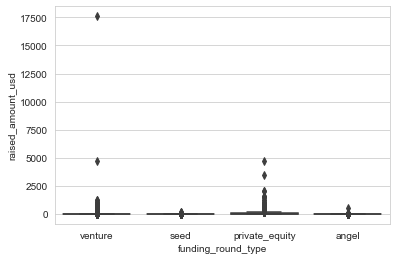

In [263]:
###################################BOX PLOT ####################################

ax = sns.boxplot(x="funding_round_type", y="raised_amount_usd", data=master_frame)

In [270]:
##################------------------Calculating the sum of raised amount for each of the 4 concerned FT---------------------------#######################
FT=master_frame.groupby('funding_round_type').sum().sort_values(by='raised_amount_usd',ascending=False)
FT

,raised_amount_usd
funding_round_type,
venture,560498.919024
private_equity,134568.045021
seed,15771.279316
angel,4274.925121


In [271]:
######Number of investments in each funding types#####
master_frame.funding_round_type.value_counts()

venture           47804
seed              21087
angel              4400
private_equity     1820
Name: funding_round_type, dtype: int64

In [272]:
Total=master_frame.groupby('funding_round_type').sum().sort_values(by='raised_amount_usd',ascending=False).sum()
Total

raised_amount_usd    715113.168482
dtype: float64

In [273]:
### Calculate the FRACTION ofinvestment and average for each of the four funding types.

FT['Fraction in %']=(FT['raised_amount_usd']/float(Total))*100
FT['Average']=master_frame.groupby('funding_round_type').mean().sort_values(by='raised_amount_usd',ascending=False)
FT=FT.drop(columns=['raised_amount_usd'])
FT.reset_index(inplace=True)
FT



,funding_round_type,Fraction in %,Average
0,venture,78.379052,11.724938
1,private_equity,18.817727,73.938486
2,seed,2.205424,0.747915
3,angel,0.597797,0.971574


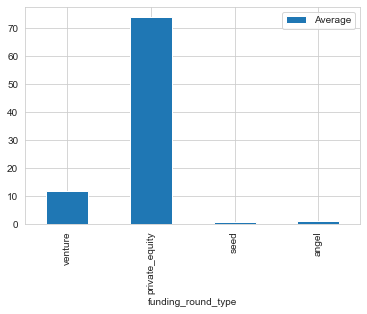

In [274]:
####Plotting the average value ####
FT.plot(kind='bar',x='funding_round_type', y='Average')

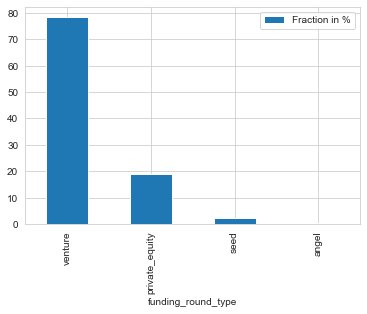

In [275]:
###Plotting the Fractuin in % #######
FT.plot(kind='bar',x='funding_round_type',y='Fraction in %')

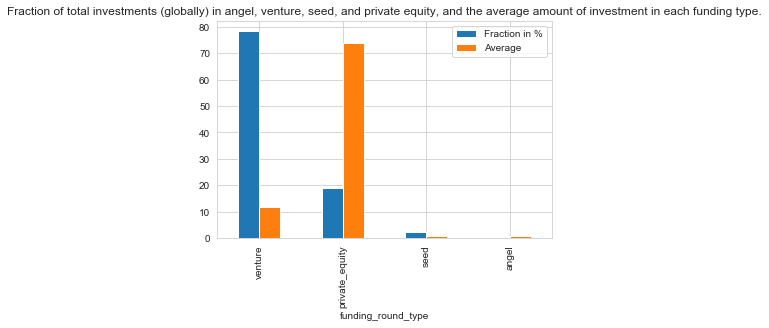

In [276]:
###CHECK POINT 6 :Plot1###Integrating the above 2 plots#######
FT.plot(kind='bar',x='funding_round_type',title='Fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type.')#, ylabel='fraction in % / Average')


In [277]:
##################------------------Calculating the Median among the 4 concerned FT---------------------------#######################
master_frame.groupby('funding_round_type').median().sort_values(by='raised_amount_usd',ascending=False)

,raised_amount_usd
funding_round_type,
private_equity,20.000000
venture,5.000000
angel,0.414906
seed,0.300000


In [280]:
##################------------------Calculating the Mean among the 4 concerned FT---------------------------#######################
master_frame.groupby('funding_round_type').mean().sort_values(by='raised_amount_usd',ascending=False)

,raised_amount_usd
funding_round_type,
private_equity,73.938486
venture,11.724938
angel,0.971574
seed,0.747915


In [281]:
###Median for Venture is less than its mean. So it is right skewed distribution######
#####In both the cases the value is between 5 and 15 USD so selecting Venture as the Funding type for Spark Funds###

In [282]:
################################Checkpoint-3################################################
############################COUNTRY ANALYSIS####################################################


In [283]:
##############Now on we need to only consider the above received 'venture' investment type#####################
master_frame = master_frame.loc[master_frame['funding_round_type'] == 'venture']
master_frame.head()


,permalink,name,category_list,country_code,city,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,IND,Mumbai,venture,10.000000
2,/organization/0-6-com,0-6.com,Curated Web,CHN,Beijing,venture,2.000000
6,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,CAN,Vancouver,venture,0.719491
8,/organization/0xdata,H2O.ai,Analytics,USA,Mountain View,venture,20.000000
9,/organization/0xdata,H2O.ai,Analytics,USA,Mountain View,venture,1.700000


In [284]:
###CHECKPOINT 3 ANALYSIS###
###The top nine countries which have received the highest total funding###
###Across ALL sectors for the chosen investment type, VENTURE###
###Creating the TOP 9###

top9 = master_frame.pivot_table(index = 'country_code',values = 'raised_amount_usd',  aggfunc = 'sum')
top9 = top9.sort_values('raised_amount_usd', ascending = False)
top9 = top9.iloc[:9, ]
top9


,raised_amount_usd
country_code,
USA,420068.029342
CHN,39338.918773
GBR,20072.813004
IND,14261.508718
CAN,9482.217668
FRA,7208.456960
ISR,6854.350477
DEU,6305.521981
JPN,3167.647127


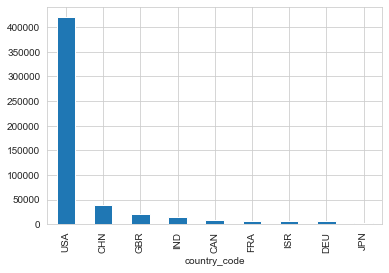

In [286]:
################################################------CHECK POINT 6--Plot2_----------------------------###############################
top9.raised_amount_usd.plot(kind='bar' , x='country_code')

In [97]:
####################--------------------COUNTRY Analysis--------------------------######################
###################3the top three English-speaking countries in the data frame top9+++++++###########.
####Retaining rows with only USA, GBR and IND country_codes, top three English speaking countries. #######
#######################VENTURE is the most representative value of the investment amount for each of the four funding types#####
####################And this is the most suitable FT for SPARK Funds########

 

In [287]:
##################SparksFunds wants to invest in only top three English speaking countries.###############
#########Retaining rows with only USA, GBR and IND country_codes##################
master_frame = master_frame[(master_frame['country_code'] == 'USA')
                            | (master_frame['country_code'] == 'GBR')
                            | (master_frame['country_code'] == 'IND')]

In [288]:
master_frame.head()

,permalink,name,category_list,country_code,city,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,IND,Mumbai,venture,10.0
8,/organization/0xdata,H2O.ai,Analytics,USA,Mountain View,venture,20.0
9,/organization/0xdata,H2O.ai,Analytics,USA,Mountain View,venture,1.7
10,/organization/0xdata,H2O.ai,Analytics,USA,Mountain View,venture,8.9
19,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,USA,Cupertino,venture,5.0


In [289]:
master_frame.shape

(38803, 7)

In [290]:
############################SECTOR #############################################
############################ANALYSIS############################################

In [291]:
####Extracting the PRIMARY SECTOR of each category list from the category_list column###############################

master_frame['primary_sector']=master_frame['category_list'].apply(lambda x: str(x).split("|")[0],master_frame['category_list'].to_list() ) 
master_frame['category_list']=master_frame['primary_sector']

In [292]:
master_frame.columns

Index(['permalink', 'name', 'category_list', 'country_code', 'city',
       'funding_round_type', 'raised_amount_usd', 'primary_sector'],
      dtype='object')

In [293]:
master_frame.head()

,permalink,name,category_list,country_code,city,funding_round_type,raised_amount_usd,primary_sector
0,/organization/-fame,#fame,Media,IND,Mumbai,venture,10.0,Media
8,/organization/0xdata,H2O.ai,Analytics,USA,Mountain View,venture,20.0,Analytics
9,/organization/0xdata,H2O.ai,Analytics,USA,Mountain View,venture,1.7,Analytics
10,/organization/0xdata,H2O.ai,Analytics,USA,Mountain View,venture,8.9,Analytics
19,/organization/1-mainstream,1 Mainstream,Apps,USA,Cupertino,venture,5.0,Apps


In [294]:
###############################Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors##########################################
##########################(Note that ‘Others’ is also considered one of the main sectors)########################

In [295]:
mapping=pd.read_csv(path+'mapping.csv',sep=",")

In [296]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [297]:
mapping.shape

(688, 10)

In [298]:
mapping.columns

Index(['category_list', 'Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')

In [299]:
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [300]:
mapping['category_list'].fillna(0,inplace=True)

In [301]:
mapping.isnull().any().any()

False

In [302]:
#Reshaping the mapping dataframe to merge with the master_frame dataframe. #######################################
############################Using melt() function to unpivot the table##############.
mapping = pd.melt(mapping, id_vars =['category_list'], value_vars =['Manufacturing','Automotive & Sports',
                                                              'Cleantech / Semiconductors','Entertainment',
                                                             'Health','News, Search and Messaging','Others',
                                                             'Social, Finance, Analytics, Advertising']
                  ,var_name='main_sector', value_name='values') 



In [303]:
mapping.main_sector.unique()

array(['Manufacturing', 'Automotive & Sports',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'], dtype=object)

In [304]:
len(mapping.main_sector.unique().tolist())

8

In [305]:
mapping.shape

(5504, 3)

In [306]:
mapping.loc[mapping['values']== 0].shape

(4817, 3)

In [307]:
mapping.loc[mapping['values']== 1].shape

(687, 3)

In [308]:
#mapping1=mapping[mapping.values!=1]
mapping=mapping.loc[mapping['values']== 1]

In [309]:
mapping.loc[mapping['values']== 0].shape

(0, 3)

In [310]:
mapping.columns

Index(['category_list', 'main_sector', 'values'], dtype='object')

In [311]:
mapping=mapping.drop('values',axis=1)

In [312]:
mapping.shape

(687, 2)

In [313]:
#####Converting dataframe back to csv, to check manually###############
mapping.to_csv(path+'new_mapping.csv', index=False) 

In [125]:
#####################-----------------MERGING the 2 datasets master_frame & mapping--------------###############


In [314]:

master_frame=pd.merge(master_frame,mapping,on='category_list',how = 'left')


In [315]:
master_frame.head()

,permalink,name,category_list,country_code,city,funding_round_type,raised_amount_usd,primary_sector,main_sector
0,/organization/-fame,#fame,Media,IND,Mumbai,venture,10.0,Media,Entertainment
1,/organization/0xdata,H2O.ai,Analytics,USA,Mountain View,venture,20.0,Analytics,"Social, Finance, Analytics, Advertising"
2,/organization/0xdata,H2O.ai,Analytics,USA,Mountain View,venture,1.7,Analytics,"Social, Finance, Analytics, Advertising"
3,/organization/0xdata,H2O.ai,Analytics,USA,Mountain View,venture,8.9,Analytics,"Social, Finance, Analytics, Advertising"
4,/organization/1-mainstream,1 Mainstream,Apps,USA,Cupertino,venture,5.0,Apps,"News, Search and Messaging"


In [316]:
master_frame.shape

(38803, 9)

In [317]:
#List of primary sectors which have no main sectors in the master_frame
print(master_frame[master_frame.main_sector.isnull()].category_list.unique())

['Nanotechnology' 'Business Analytics' 'Contact Management'
 'Career Management' 'Cloud Management' 'Big Data Analytics'
 'Document Management' 'Digital Signage' 'Journalism' 'Waste Management'
 'Energy Management' 'Lead Management' 'Event Management' 'IT Management'
 'Cannabis' 'Investment Management' 'Knowledge Management'
 'Identity Management' 'Personalization' 'Natural Gas Uses'
 'Alternative Medicine' 'Natural Language Processing'
 'Intellectual Asset Management' 'Risk Management' 'Adaptive Equipment'
 'Supply Chain Management' 'Innovation Management' 'Project Management'
 'Racing' 'Specialty Retail' 'Biotechnology and Semiconductor'
 'Educational Games' 'Rapidly Expanding' 'Digital Rights Management'
 'Governance' 'Professional Services' 'Mobile Analytics' 'Navigation'
 'Product Search' 'Property Management' 'Personal Finance'
 'Fleet Management' 'GreenTech' 'Retirement' 'Professional Networking'
 'Task Management']


In [318]:
master_frame['category_list'].nunique()

563

In [319]:
master_frame.shape

(38803, 9)

In [320]:
master_frame.isnull().any()

permalink             False
name                  False
category_list         False
country_code          False
city                   True
funding_round_type    False
raised_amount_usd     False
primary_sector        False
main_sector            True
dtype: bool

In [321]:
master_frame['main_sector'].isnull().sum()

592

In [322]:
#Number of main_sectors with NaN main_sector value for unique category list
print(len(master_frame[master_frame['main_sector'].isnull()].category_list.unique()))


46


In [323]:
########################out of these 38803 rows, 592 rows has got null values in the main_sector column##########################

################################################################################################################

In [324]:
##############################CHECKPOINT 5###########################################
##########################Creating three separate data frames D1, D2 and D3 for each of the three countries ############################
######################containing the observations of funding type VENTURE falling within the 5-15 million USD range.###########################


In [325]:
######Checking for GBR#####
D1 = master_frame[(master_frame['country_code'] == 'USA') & 
                  (master_frame.raised_amount_usd >= 5.0) & (master_frame.raised_amount_usd <= 15.0)]


In [326]:
D1.shape

(12064, 9)

In [327]:
D1.head()

,permalink,name,category_list,country_code,city,funding_round_type,raised_amount_usd,primary_sector,main_sector
3,/organization/0xdata,H2O.ai,Analytics,USA,Mountain View,venture,8.900000,Analytics,"Social, Finance, Analytics, Advertising"
4,/organization/1-mainstream,1 Mainstream,Apps,USA,Cupertino,venture,5.000000,Apps,"News, Search and Messaging"
17,/organization/128-technology,128 Technology,Service Providers,USA,Burlington,venture,11.999347,Service Providers,Others
20,/organization/1366-technologies,1366 Technologies,Manufacturing,USA,Bedford,venture,15.000000,Manufacturing,Manufacturing
21,/organization/1366-technologies,1366 Technologies,Manufacturing,USA,Bedford,venture,5.000000,Manufacturing,Manufacturing


In [328]:
####Total number of investment and total amount of investment in each of the main_sector and mergeing it with master_frame

D1_group = D1[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount','count' : 'Total_count'})
D1_group.head()



raised_amount_usd            
                                Total_amount Total_count
main_sector                                             
Automotive & Sports              1454.104361         167
Cleantech / Semiconductors      21181.003033        2297
Entertainment                    5000.212982         580
Health                           8200.859357         908
Manufacturing                    7258.553378         799

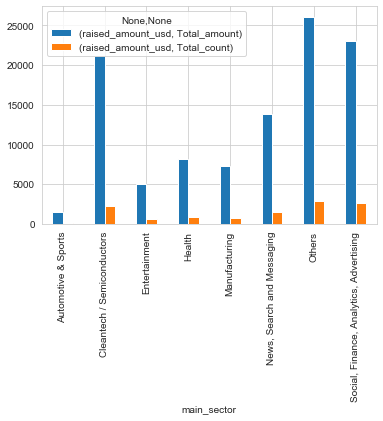

In [329]:
D1_group.plot(kind='bar')#, x='main_sector', y='raised_amount_usd')

In [330]:
D1 = D1.merge(D1_group, how='left', on ='main_sector')
D1.head()



,permalink,name,category_list,country_code,city,funding_round_type,raised_amount_usd,primary_sector,main_sector,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)"
0,/organization/0xdata,H2O.ai,Analytics,USA,Mountain View,venture,8.900000,Analytics,"Social, Finance, Analytics, Advertising",23048.381919,2632.0
1,/organization/1-mainstream,1 Mainstream,Apps,USA,Cupertino,venture,5.000000,Apps,"News, Search and Messaging",13796.816094,1563.0
2,/organization/128-technology,128 Technology,Service Providers,USA,Burlington,venture,11.999347,Service Providers,Others,26089.280296,2923.0
3,/organization/1366-technologies,1366 Technologies,Manufacturing,USA,Bedford,venture,15.000000,Manufacturing,Manufacturing,7258.553378,799.0
4,/organization/1366-technologies,1366 Technologies,Manufacturing,USA,Bedford,venture,5.000000,Manufacturing,Manufacturing,7258.553378,799.0


In [331]:
####US######
######The total number (or count) of investments in VENTURE (Total count of all the main sectors)
#####The total amount invested in VENTURE (Sum of all the main sectors)
print(D1.raised_amount_usd.count())
print(round(D1.raised_amount_usd.sum(),2))

12064
107766.58


In [333]:
####Checking for GBR####
D2 = master_frame[(master_frame['country_code'] == 'GBR') & (master_frame.raised_amount_usd >= 5.0) & (master_frame.raised_amount_usd <= 15.0)]

In [334]:
D2.shape

(621, 9)

In [335]:
D2.head()

,permalink,name,category_list,country_code,city,funding_round_type,raised_amount_usd,primary_sector,main_sector
108,/organization/365scores,365Scores,Android,GBR,London,venture,5.500000,Android,"Social, Finance, Analytics, Advertising"
232,/organization/7digital,7digital,Content Creators,GBR,London,venture,8.468328,Content Creators,Entertainment
233,/organization/7digital,7digital,Content Creators,GBR,London,venture,10.000000,Content Creators,Entertainment
256,/organization/90min,90min,Media,GBR,London,venture,15.000000,Media,Entertainment
257,/organization/90min,90min,Media,GBR,London,venture,5.800000,Media,Entertainment


In [336]:
D2_group=D2[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount','count' : 'Total_count'})
D2_group.head()



raised_amount_usd            
                                Total_amount Total_count
main_sector                                             
Automotive & Sports               167.051565          16
Cleantech / Semiconductors       1136.905008         127
Entertainment                     461.511059          54
Health                            214.537510          24
Manufacturing                     361.940335          42

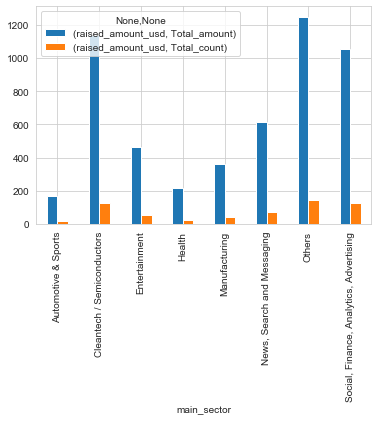

In [337]:
D2_group.plot(kind='bar')

In [338]:
D2=D2.merge(D2_group,how='left', on ='main_sector')

D2.head(2)

,permalink,name,category_list,country_code,city,funding_round_type,raised_amount_usd,primary_sector,main_sector,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)"
0,/organization/365scores,365Scores,Android,GBR,London,venture,5.500000,Android,"Social, Finance, Analytics, Advertising",1057.064848,128.0
1,/organization/7digital,7digital,Content Creators,GBR,London,venture,8.468328,Content Creators,Entertainment,461.511059,54.0


In [339]:
####GBR######
######The total number (or count) of investments in VENTURE (Total count of all the main sectors)
#####The total amount invested in VENTURE (Sum of all the main sectors)
print(D2.raised_amount_usd.count())
print(round(D2.raised_amount_usd.sum(),2))

621
5379.08


In [340]:
####Checking for INDIA
D3 = master_frame[(master_frame['country_code'] == 'IND') & (master_frame.raised_amount_usd >= 5.0) & (master_frame.raised_amount_usd <= 15.0)]

In [341]:
D3.shape

(328, 9)

In [342]:
D3.head()

,permalink,name,category_list,country_code,city,funding_round_type,raised_amount_usd,primary_sector,main_sector
0,/organization/-fame,#fame,Media,IND,Mumbai,venture,10.000000,Media,Entertainment
55,/organization/21diamonds-india,21Diamonds,E-Commerce,IND,Gurgaon,venture,6.369507,E-Commerce,Others
276,/organization/a-little-world,A LITTLE WORLD,Finance,IND,Mumbai,venture,6.410000,Finance,"Social, Finance, Analytics, Advertising"
926,/organization/adlabs-imagica,Adlabs Imagica,Entertainment,IND,Khopoli,venture,8.180000,Entertainment,Entertainment
1262,/organization/agile,Agile,Finance,IND,Mumbai,venture,5.740000,Finance,"Social, Finance, Analytics, Advertising"


In [343]:
D3_group=D3[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum','count']).rename(
    columns={'sum':'Total_amount','count' : 'Total_count'})



D3_group.head()


raised_amount_usd            
                                Total_amount Total_count
main_sector                                             
Automotive & Sports                   136.90          13
Cleantech / Semiconductors            165.38          20
Entertainment                         280.83          33
Health                                167.74          19
Manufacturing                         200.90          21

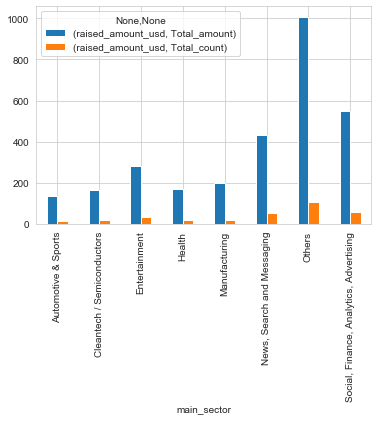

In [344]:
D3_group.plot(kind='bar')

In [345]:
D3=D3.merge(D3_group,how='left', on ='main_sector')
D3.head(2)

,permalink,name,category_list,country_code,city,funding_round_type,raised_amount_usd,primary_sector,main_sector,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)"
0,/organization/-fame,#fame,Media,IND,Mumbai,venture,10.000000,Media,Entertainment,280.830000,33.0
1,/organization/21diamonds-india,21Diamonds,E-Commerce,IND,Gurgaon,venture,6.369507,E-Commerce,Others,1007.409507,109.0


In [346]:
####INDIA######
######The total number (or count) of investments in VENTURE (Total count of all the main sectors)
#####The total amount invested in VENTURE (Sum of all the main sectors)
print(D3.raised_amount_usd.count())
print(round(D3.raised_amount_usd.sum(),2))

328
2949.54


In [347]:
#######TOP3 sectore based on count of investments#################For each country#########################

In [348]:
top3_US = D1.pivot_table(index = 'main_sector', values = 'raised_amount_usd',  aggfunc = 'count')
top3_US = top3_US.sort_values(by = 'raised_amount_usd', ascending = False)
top3_US = top3_US.iloc[:3, ]
top3_US

,raised_amount_usd
main_sector,
Others,2923
"Social, Finance, Analytics, Advertising",2632
Cleantech / Semiconductors,2297


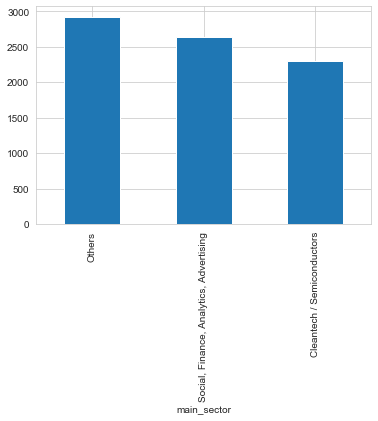

In [349]:
###########TOP 3 sectors in the US####################################

top3_US.raised_amount_usd.plot(kind='bar' , x='main_sector', y='raised_amount_usd')

In [350]:
###TOP 3 sectors in the GBR###
top3_GBR = D2.pivot_table(values = 'raised_amount_usd', index = 'main_sector', aggfunc = 'count')
top3_GBR = top3_GBR.sort_values(by = 'raised_amount_usd', ascending = False)
top3_GBR = top3_GBR.iloc[:3, ]
top3_GBR

,raised_amount_usd
main_sector,
Others,143
"Social, Finance, Analytics, Advertising",128
Cleantech / Semiconductors,127


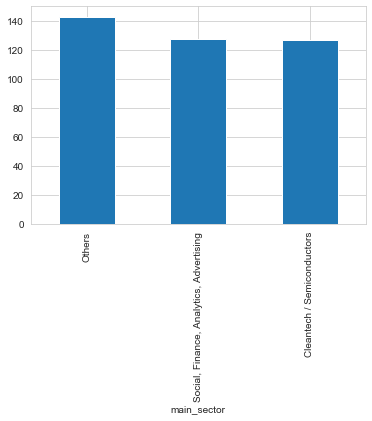

In [351]:
top3_GBR.raised_amount_usd.plot(kind='bar' , x='main_sector', y='raised_amount_usd')

In [352]:
###TOP 3 sectors in the IND###
top3_IND = D3.pivot_table(values = 'raised_amount_usd', index = 'main_sector', aggfunc = 'count')
top3_IND = top3_IND.sort_values(by = 'raised_amount_usd', ascending = False)
top3_IND = top3_IND.iloc[:3, ]
top3_IND

,raised_amount_usd
main_sector,
Others,109
"Social, Finance, Analytics, Advertising",60
"News, Search and Messaging",52


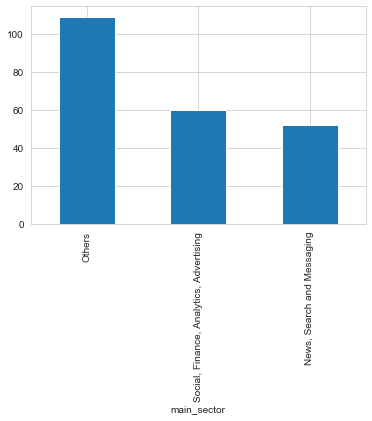

In [353]:
top3_IND.raised_amount_usd.plot(kind='bar' , x='main_sector', y='raised_amount_usd')

In [354]:
#################################### 'Name' of the COMPANY in the TOP SECTOR in the US###########################################

company = D1[D1['main_sector']=='Others']
company = company.pivot_table(index='name',values='raised_amount_usd',aggfunc='sum')
company = company.sort_values(by='raised_amount_usd',ascending=False)
company.head(1)

,raised_amount_usd
name,
Virtustream,64.3


In [355]:
#########'Name' of the COMPANY in the second best SECTOR in the US#########
company = D1[D1['main_sector']=='Cleantech / Semiconductors']
company = company.pivot_table(index = 'name',values = 'raised_amount_usd',  aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
company.head(1)

,raised_amount_usd
name,
Biodesix,75.3


In [356]:
#########'Name' of the COMPANY in the second best SECTOR in GBR#########
company = D2[D2['main_sector']=='Others']
company = company.pivot_table(index='name',values='raised_amount_usd',aggfunc='sum')
company = company.sort_values(by='raised_amount_usd',ascending=False)
company.head(1)

,raised_amount_usd
name,
Electric Cloud,37.0


In [357]:
#########'Name' of the COMPANY in the second best SECTOR in GBR#########
company = D2[D2['main_sector']=='Cleantech / Semiconductors']
company = company.pivot_table(index='name',values='raised_amount_usd',aggfunc='sum')
company = company.sort_values(by='raised_amount_usd',ascending=False)
company.head(1)

,raised_amount_usd
name,
EUSA Pharma,35.6


In [358]:
#########'Name' of the COMPANY in the TOP SECTOR in INDIA#########
company = D3[D3['main_sector']=='Others']
company = company.pivot_table(index='name',values='raised_amount_usd',aggfunc='sum')
company = company.sort_values(by='raised_amount_usd',ascending=False)
company.head(1)

,raised_amount_usd
name,
FirstCry.com,39.0


In [359]:
#########'Name' of the COMPANY in the second best SECTOR in INDIA#########
company = D3[D3['main_sector']=='News, Search and Messaging']
company = company.pivot_table(index='name',values='raised_amount_usd',aggfunc='sum')
company = company.sort_values(by='raised_amount_usd',ascending=False)
company.head(1)

,raised_amount_usd
name,
GupShup,33.0


In [360]:
##############################Checkpoint 6#############################
######################################################################

In [361]:
top3=pd.concat([top3_US,top3_GBR,top3_IND],axis=1)
top3
test=top3.rename(columns={'US':'country_code','GBR':'country_code','INDIA':'country_code'})
test.T

,Cleantech / Semiconductors,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
raised_amount_usd,2297.0,NaN,2923.0,2632.0
raised_amount_usd,127.0,NaN,143.0,128.0
raised_amount_usd,NaN,52.0,109.0,60.0


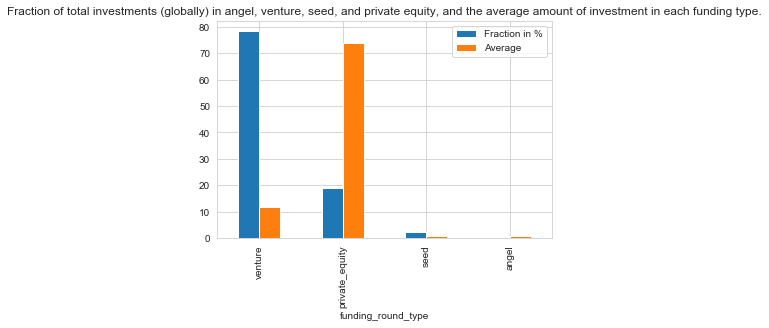

In [362]:
###CHECK POINT 6 :Plot1###
FT.plot(kind='bar',x='funding_round_type',title='Fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type.')#, ylabel='fraction in % / Average')


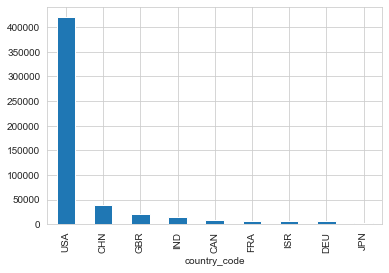

In [363]:
###CHECK POINT 6 :Plot2###
top9.raised_amount_usd.plot(kind='bar' , x='coutry_code', y='raised_amount_usd')

In [364]:
##############CHECK POINT 6 Plot3###################################
#######A plot showing the number of investments in the top 3 sectors of the top 3 countries ######################################
#############################on one chart (for the chosen investment type FT). ,################################


In [368]:
####Praparing data for the plot#####
top3_US['country_code']='US'
top3_GBR['country_code']='GBR'
top3_IND['country_code']='IND'
top3_US.reset_index(inplace=True)
top3_GBR.reset_index(inplace=True)
top3_IND.reset_index(inplace=True)
frames = [top3_US,top3_GBR,top3_IND]
result = pd.concat(frames)
result

,index,main_sector,raised_amount_usd,country_code
0,0,Others,2923,US
1,1,"Social, Finance, Analytics, Advertising",2632,US
2,2,Cleantech / Semiconductors,2297,US
0,0,Others,143,GBR
1,1,"Social, Finance, Analytics, Advertising",128,GBR
2,2,Cleantech / Semiconductors,127,GBR
0,0,Others,109,IND
1,1,"Social, Finance, Analytics, Advertising",60,IND
2,2,"News, Search and Messaging",52,IND


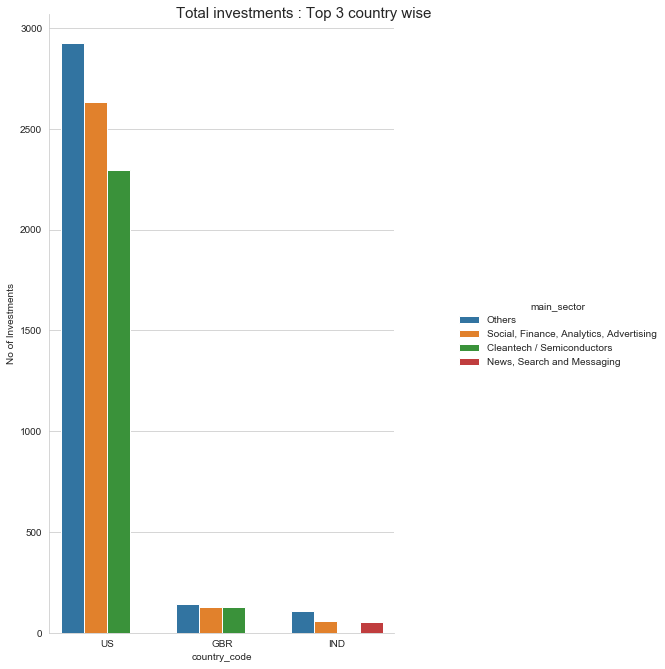

In [369]:
###CHECK POINT 6 :Plot3-FACTOR PLOT###
f=sns.factorplot(x='country_code', y='raised_amount_usd', hue='main_sector', data=result, kind='bar')
f.fig.suptitle('Total investments : Top 3 country wise', fontsize= 15)
f.fig.set_size_inches(10, 10)
f.set_xlabels( fontsize= 10)
f.set_ylabels('No of Investments', fontsize= 10)
f.set_xticklabels(fontsize= 10)
f.set_yticklabels(fontsize= 10)
